In [58]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

from scipy.special import expit, logit
import seaborn as sns


array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.33333333,
        1.        ],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.66666667,
        1.        ],
       [0.25      , 0.        , 0.33333333, ..., 0.        , 0.66666667,
        1.        ],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.58333333, 1.        , 0.        , ..., 0.25      , 1.        ,
        0.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.25      , 0.66666667,
        0.        ]])

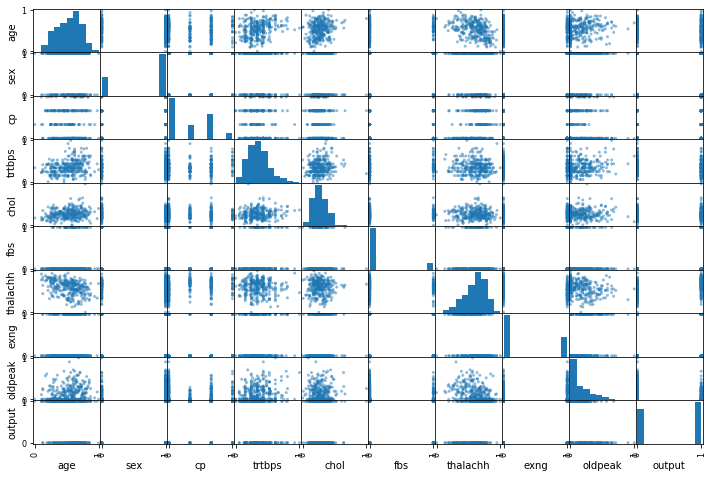

In [59]:
data = pd.read_csv('/home/josh/heartproj/heart.csv')
pipeline = Pipeline([('minmax_scaler', MinMaxScaler())])
features = list(data.columns)
data = pipeline.fit_transform(data)
df = pd.DataFrame(data,columns = features).drop(["caa", "slp", "thall", "restecg"], axis = 1)
df.corr()["trtbps"].sort_values(ascending =False)
new_feats = list(df.columns)
scatter_matrix(df[new_feats], figsize=(12,8))
data

In [3]:
df = df.sample(frac=1)
y = df["output"]
X = df.drop(["output"], axis =1)
X_train, y_train = X[:203].to_numpy(), y[:203].to_numpy()
X_test, y_test = X[203:].to_numpy(), y[203:].to_numpy()


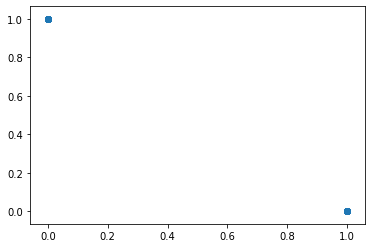

In [4]:
y_1 = []
#y_0 = []

for y_i in y:
    if y_i == 1:
        y_1.append("yes")
    else:
        y_1.append("no")
y_n = pd.get_dummies(pd.Series(np.asarray(y_1)))["no"]
y_y = pd.get_dummies(pd.Series(np.asarray(y_1)))["yes"]

plt.scatter(y_y, y_n)

In [5]:

def shuff_data(df):
    df = df.sample(frac=1)
    y = df["output"]
    X = df.drop(["output"], axis =1)
    X_train, y_train = X[:203].to_numpy(), y[:203].to_numpy()
    X_test, y_test = X[203:].to_numpy(), y[203:].to_numpy()
    return X_train, y_train

In [6]:
def linear_regression_normal(X,y):
    
    return np.linalg.solve(X.T.dot(X), X.T.dot(y))
    

In [20]:
def train_error(X_train, y_train, w):
    return 1/len(y_train)*np.sum((X_train.dot(w) - y_train)**2)

In [21]:
def test_error(X_test, y_test, w):
    return 1/len(y_test)*np.sum((X_test.dot(w) - y_test)**2)

In [9]:
def linear_reg_GD(X, y, w, num_iters, alpha):
    for i in range(num_iters):
        w = w - alpha*2/len(y)*X.T.dot(X.dot(w)-y)
    return w
    

In [10]:
def linear_reg_SGD(data, w, num_iters, alpha):
    for k in range(num_iters):
        X, y = shuff_data(data)
        
        for i in range(len(y)):
            w = w - alpha*2*X[i].T.dot((X[i].dot(w) - y[i]))
    return w
        
    

In [11]:
def sig(x):
    return expit(x)

In [12]:
def logistic_reg_SGD(data, w, num_iters, alpha):
    
    for _ in range(num_iters):
        X, y = shuff_data(data)
        for i in range(len(y)):
            w = w + alpha*X[i].T.dot(y[i] - sig(w.T.dot(X[i])))
    return w

In [13]:
def y_labels_log_reg(X, w_):
    y = []
    for x_i in X:
        if sig(w_.T.dot(x_i)) >= 0.5:
            y.append(1.0)
        else:
            y.append(0.0)
    y = np.asarray(y)
    return y
    

In [14]:
w = linear_regression_normal(X_train,y_train)

In [15]:
w_linear_GD = linear_reg_GD(X_train, y_train, np.random.randn(w.shape[0]), 100, 0.1)

In [16]:
w_linear_SGD = linear_reg_SGD(df, np.random.randn(w.shape[0]), 100, 0.1)

In [17]:
w_log_sgd = logistic_reg_SGD(df, np.zeros(X_train[0].shape[0]), 1000, 0.1)


In [22]:
print(train_error(X_train, y_train,w), test_error(X_test, y_test, w))


0.13276525136135323 0.18191637305964586


In [23]:
print(train_error_norm(X_train, y_train,w_linear_GD), test_error_norm(X_test, y_test, w_linear_GD))


0.16284524201622955 0.21758752489135533


In [24]:
print(train_error(X_train, y_train,w_linear_SGD), test_error(X_test, y_test, w_linear_SGD))


0.15646434732518558 0.21495336367733742


In [25]:
def cross_entropy(X,w,y):

    calcs = []
    for i in range(len(y)):
        calcs.append((-1.0*y[i])*np.log(sig(w.T.dot(X[i]))) + (1.0-y[i])*np.log(1.0-sig(w.T.dot(X[i]))))
        

    return np.abs(np.sum(calcs)/len(y))


In [26]:
cross_entropy(X_test,w_log_sgd,y_test) # correctly classified

0.05671180546926385

In [27]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from matplotlib import pyplot as plt
def gen_gaussian_points(n, mean, sigma):
    return np.random.normal(mean, sigma, [n, 2])


N = 100

class_a = gen_gaussian_points(N, [-1, -1], [1, 1])
class_b = gen_gaussian_points(N, [1, 1], [1, 1])

X_ = np.vstack([class_a, class_b])
y_ = np.vstack([[-1]] * N + [[1]] * N).reshape((-1,))


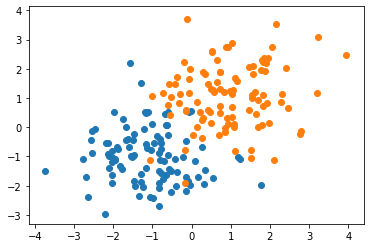

In [28]:
plt.scatter(*class_a.T)
plt.scatter(*class_b.T)

In [29]:
poly = PolynomialFeatures(2)
X_toy = poly.fit_transform(X_)
#def compute_gram(X,X.T):
#return np.mat_mul(X,X.T)
y_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [30]:
def kernel_poly(x,z):
    return (x.T.dot(z) + 1)**2 

In [41]:
def dot_kernel(X):
    return X.dot(X.T)
    

In [33]:
def construct_gram(X, ker_func):
    mat = []
        
    for x in X:
        vec = []
        for z in X:
            vec.append(ker_func(x,z))
        mat.append(np.hstack(np.asarray(vec)))
    return np.asarray(mat)


In [34]:
K = construct_gram(X_, kernel_poly)

In [35]:
def sig(x):
    return expit(x)

In [36]:
def kernel_ridge_regression(test_x,X,lambda_):
    ker_vec = []
    I = np.eye(K.shape[0], K.shape[0])
    alpha_ = (np.linalg.inv(K+lambda_*I)).dot(y_)
    for v in X:
        ker_vec.append(kernel_poly(v, test_x))
    ker_vec = np.asarray(ker_vec)
    return alpha_.dot(ker_vec)


In [50]:
def kernel_logistic_regression(X_train, y_train, num_iters, alpha):
    K = X_train.dot(X_train.T)
    a = np.ones(K[1].shape[0])
    y_train = np.array(y_train)
    for _ in range(num_iters):
        for i in range(len(y_train)):
            a = a + alpha*(y_train[i]-sig(K.dot(a)))
    return a


In [51]:
y_pred = []
for x in X_:
    y_pred.append(kernel_ridge_regression(x,X_,0.1))
y_pred = np.asarray(y_pred)


In [52]:
1-1/len(y_)*np.sum((y_pred - y_)**2)

0.6965158387128054

In [56]:
a = kernel_logistic_regression(X_, y_, 100, 0.00001)